# NÚMEROS COMPLEJOS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
a=complex(5,8)
b=complex(4,-7)
print("\n Sean dos números complejos a: \n")
print(a)
print("\n y b: \n")
print(b)
print("\n La suma de dos compejos es: \n")
print(a+b)
print("\n El producto de dos complejos es: \n")
print(a*b)
print("\n La parte real del complejo a es: \n")
print(a.real)
print("\n La magnitud del complejo a es: \n")
print(abs(a))
print("\n El complejo conjugado del complejo a es: \n")
print(a.conjugate())


 Sean dos números complejos a: 

(5+8j)

 y b: 

(4-7j)

 La suma de dos compejos es: 

(9+1j)

 El producto de dos complejos es: 

(76-3j)

 La parte real del complejo a es: 

5.0

 La magnitud del complejo a es: 

9.433981132056603

 El complejo conjugado del complejo a es: 

(5-8j)


## DFT

In [5]:
import cmath

In [6]:
imagina = complex(0,1)
N=201
a=[]
resultado=[]
i=0
j=0
#FUNCION CONTINUA, SE GENERA EL VECTOR a DE ENTRADA
for i in range(N):
    a.append(50*cmath.exp(-0.025*i))
    resultado.append(complex(0))

#APLICA LA TRANSFORMADA DE FOURIER
im=1
for i in range(int(-N/2),int(N/2),1):
    resultado[im]=0;
    k=1
    for j in range(int(-N/2),int(N/2),1):
        resultado[im]=(resultado[im]+cmath.exp(imagina*cmath.pi*i*j/N)*a[k])
        k+=1
    im+=1


In [7]:
a

[(50+0j),
 (48.76549560141663+0j),
 (47.5614712250357+0j),
 (46.38717431642764+0j),
 (45.241870901797974+0j),
 (44.124845129229776+0j),
 (43.03539882125289+0j),
 (41.97285103846037+0j),
 (40.936537653899094+0j),
 (39.925810937968855+0j),
 (38.94003915357025+0j),
 (37.97860616124842+0j),
 (37.040911034085894+0j),
 (36.12636768210361+0j),
 (35.23440448593567+0j),
 (34.364463939548614+0j),
 (33.51600230178197+0j),
 (32.68848925649237+0j),
 (31.881407581088666+0j),
 (31.094252823251+0j),
 (30.326532985631673+0j),
 (29.577768218340754+0j),
 (28.847490519024333+0j),
 (28.135243440347786+0j),
 (27.44058180470132+0j),
 (26.763071425949512+0j),
 (26.102288838050804+0j),
 (25.45782103037746+0j),
 (24.829265189570474+0j),
 (24.21622844776812+0j),
 (23.618327637050733+0j),
 (23.03518904994829+0j),
 (22.466448205861077+0j),
 (21.91174962324746+0j),
 (21.370746597436334+0j),
 (20.84310098392542+0j),
 (20.328482987029954+0j),
 (19.82657095374964+0j),
 (19.337051172725058+0j),
 (18.859617678157843+0j)

In [8]:
resultado

[0j,
 (0.20532948018125452-35.046214097489184j),
 (-35.326740200724856-0.690022987422038j),
 (-0.22296584223996108+35.603740150845375j),
 (35.91269629088285+0.7157287636917034j),
 (0.24195056711092028-36.18851708006449j),
 (-36.527208548947556-0.7427394120988466j),
 (-0.26239711534223065+36.80222553349277j),
 (37.17205101318065+0.7711742086593754j),
 (0.2844312479130744-37.446694090802296j),
 (-37.84915560298162-0.8011657319724401j),
 (-0.30819268686969437+38.123915608453785j),
 (38.560629767215026+0.8328616756916163j),
 (0.33383704288409627-38.836065791861365j),
 (-39.30877656392486-0.866426955596252j),
 (-0.3615380598220618+39.58552435566566j),
 (40.096117570744376+0.9020461673070934j),
 (0.3914902373896648-40.37489920226202j),
 (-40.9254191020402-0.9399264629106068j),
 (-0.42391190644295057+41.20705413224607j),
 (41.79972230260609+0.9803009301795502j),
 (0.4590488484774706-42.085140703022525j),
 (-42.72237780263654-1.0234325773751674j),
 (-0.4971785721761749+43.012634977635955j),
 (

Text(0.5, 1.0, 'Tren de pulsos exponenciales')

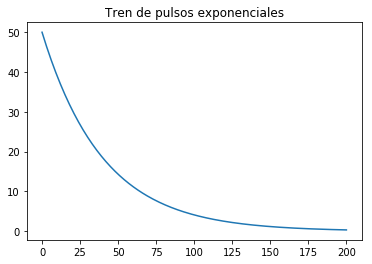

In [12]:
plt.plot(np.abs(a))
plt.title("Tren de pulsos exponenciales")

Text(0.5, 1.0, 'DFT de un tren de pulsos exponenciales')

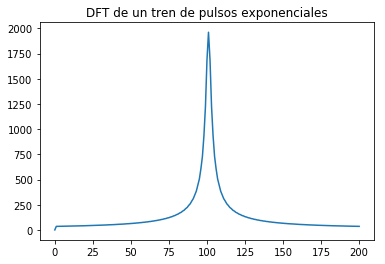

In [13]:
plt.plot(np.abs(resultado))
plt.title("DFT de un tren de pulsos exponenciales")

## APLICACIÓN DE UN FILTRO BUTTERWORTH

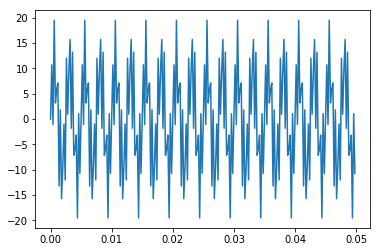

In [17]:
#CREANDO UNA SEÑAL QUE CONSTA DE LA SUMA DE DOS SENOIDALES
fs=5000.0
cutf=500.0
T=0.05
nsamples=T*fs
t = np.linspace(0,T,nsamples,endpoint=False)
x = (10*np.sin(2000*t*2*np.pi)+10*np.sin(400*t*2*np.pi));
plt.clf()
plt.plot(t,x,label='señal senoidal compuesta')

In [18]:
from scipy.signal import freqz, butter, lfilter

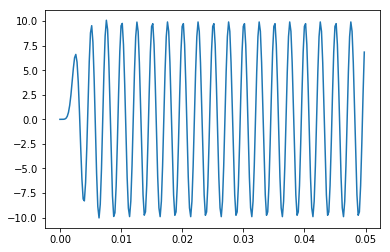

In [19]:
#SE DESEA REALIZAR EL FILTRO QUE ATENUE LA SEÑAL DE 400HZ Y SOLO LA DE 2000HZ APAREZCA
#CREANDO UN FILTRO BUTTERWORTH CON UNA FRECUENCIA DE CORTE DE 500HZ
nyq = 0.5*fs
low = cutf/nyq
b,a = butter(9,low,btype='low')
y_filtrada=lfilter(b,a,x)
plt.clf()
plt.plot(t,y_filtrada)